# Tutorial 2.1: The f-I Curve of the LIF Neuron

## Neuroscience goals: 
- understand why firing rate increases with current
- why increase is sharp at threshold in LIF model
- how noise causes a smoothing of the f-I curve

## Computational goals:
- gain experience using the forward euler method
- recording data from nested for loops
- using random number generator to add noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 1a (i) Define parameters
e_leak = -70e-3
r_membrane = 5e6
c_membrane = 2e-9
v_threshold = -50e-3
v_reset = -65e-3
tau_m = c_membrane * r_membrane

In [3]:
# 1a (ii) Create time vector
dt = 0.0001
t = np.arange(0, 2, dt)

In [4]:
# 1a (iii) Create vector for membrane potential
v = np.zeros_like(t)

In [5]:
# 1a (iv) Set initial value of membrane potential to e_leak
v[0] = e_leak

In [6]:
# 1a (v) Create a vector for applied current i_app, of size identical to time vector t
# With each entry set to a constant value i_0

i_th = (v_threshold - e_leak) / r_membrane           # threshold value computed in 1b
i_0 = i_th * 1.01                                    # was getting the wrong threshold value by orders of magnitude
i_app = np.ones_like(t) * i_0                        # likely because parameter units were off !!!
i_app

array([4.04e-09, 4.04e-09, 4.04e-09, ..., 4.04e-09, 4.04e-09, 4.04e-09])

Text(0, 0.5, 'Voltage (mV)')

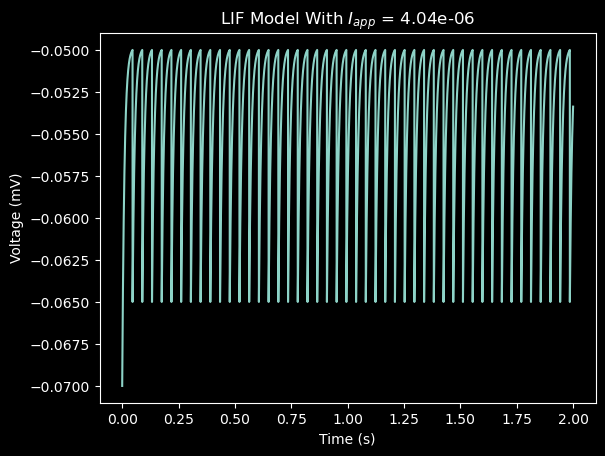

In [12]:
# 1a (vi, vii, viii)
# Set up loop to update membrane potential over time using Forward Euler method or 
# other preferred method of integration

# Using Forward Euler

def runsim(i_app=i_app):

    for i in range(1, t.shape[0]):
        dvdt = (e_leak - v[i - 1]) / (r_membrane * c_membrane) + (i_app[i]/c_membrane)
        v[i] = v[i - 1] + dt * dvdt

        if v[i] > v_threshold:
            v[i] = v_reset
    return v
v = runsim()
plt.plot(t, v)
plt.title('LIF Model With $I_{app}$ = 4.04e-06')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')

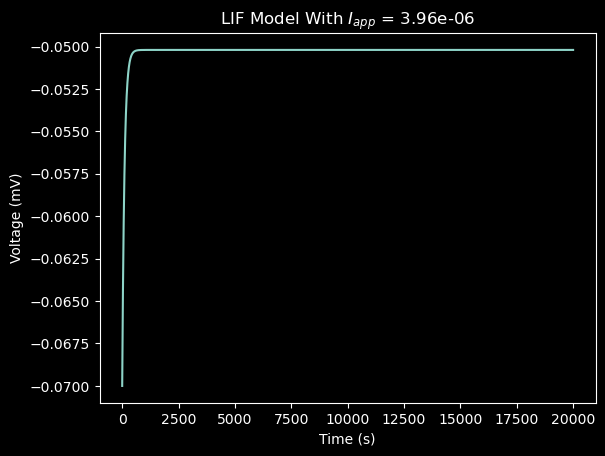

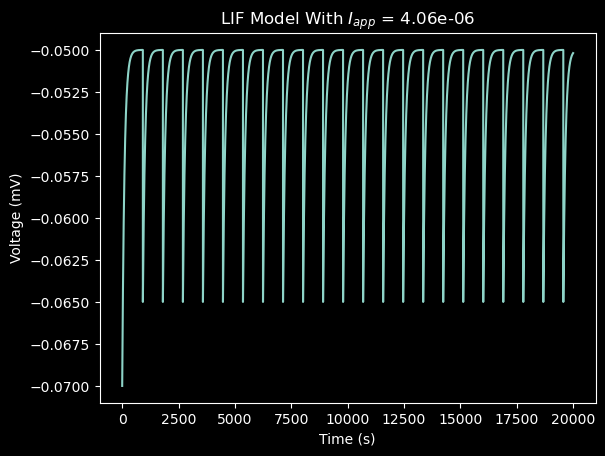

In [20]:
# 1b
# What is the minimum applied current needed for the neuron to produce spikes? 
# Calculate using Ith = Gl(Vth - El) from (2.11), then simulate the model with applied currents:
# In each case, plot the membrane potential, V(t), over a time interval of 200ms or ISI if

# (i) slightly lower than minumum current

# Set i_app to 0.99 * minimum current
i_th = (v_threshold - e_leak) / r_membrane           # threshold value computed in 1b
i_0 = i_th * 0.99                                    # was getting the wrong threshold value by orders of magnitude
i_app = np.ones_like(t) * i_0   

# Forward Euler
v = runsim(i_app)
        
# Plot neuron over 500ms
plt.plot(v)
plt.title('LIF Model With $I_{app}$ = 3.96e-06')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()


# (ii) slightly highger than minimum current

# Set i_app to 1.01 * minimum current
i_th = (v_threshold - e_leak) / r_membrane           # threshold value computed in 1b
i_0 = i_th * 1.0001                                    # was getting the wrong threshold value by orders of magnitude
i_app = np.ones_like(t) * i_0   

# Forward Euler
v = runsim(i_app)
        
# Plot neuron over 500ms
plt.plot(v)
plt.title('LIF Model With $I_{app}$ = 4.06e-06')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()

Text(0, 0.5, 'Firing Rate (Hz)')

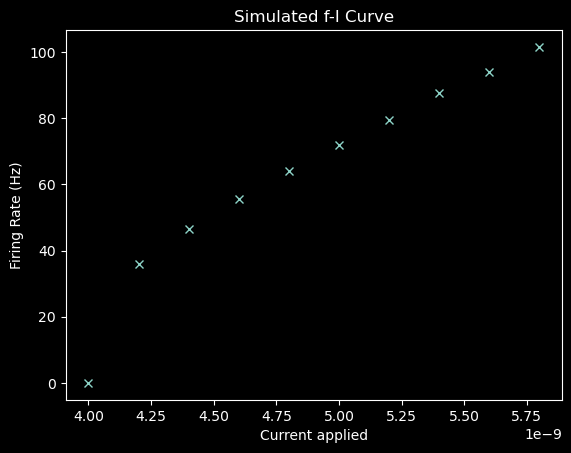

In [22]:
# 1c Make another for loop to use at least 10 different values of Iapp
# One value for each 2s simulation (a "trial") such that the average firing rate (f)
# Varies in the range from 0 to 100Hz
# Plot the resulting firing rate as a function of injected current (called the firing rate/f-I curve)

# Hint: you need to create one vector that stores each value of Iapp and 
# A vector of the same size to store the corresponding firing rates.
# In each trial, count spikes and convert to firing rate.
# Plot these two vectors against each other after simulating all trials

def count_spikes(v, v_reset):
    # Counts number of spikes by counting number of resets
    counter = 0 
    for i in range(v.shape[0]):
        if v[i] == v_reset:
            counter += 1
    return counter

currents = np.linspace(1, 1.45, 10)
currents = currents * i_th
rates = np.zeros_like(currents)

for i in range(currents.shape[0]):
    # Reset simulation each time
    v = np.zeros_like(t)
    v[0] = e_leak
    i_0 = currents[i]
    i_app = np.full_like(t, i_0)
    
    # Run simulation
    v = runsim(i_app)
    
    # Calculate spike rate
    num_spikes = count_spikes(v, v_reset)
    spike_rate = num_spikes / 2         # 2 seconds
    rates[i] = spike_rate
    
plt.plot(currents, rates, 'x')
plt.title('Simulated f-I Curve')
plt.xlabel('Current applied')
plt.ylabel('Firing Rate (Hz)')


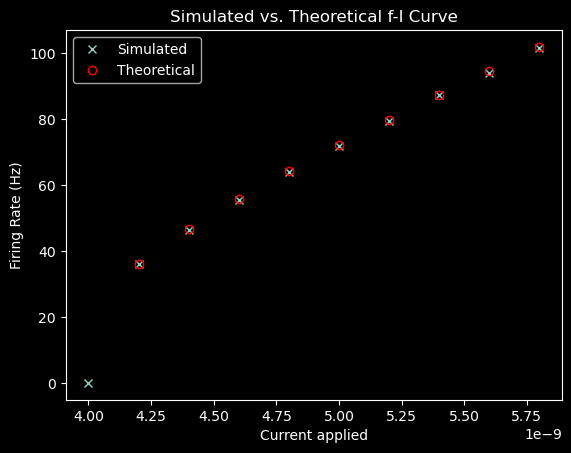

In [23]:
# 1d 
# Compare the curve obtained by the equation below for the firing rate of the neuron as you vary injected current
# 1/f = tau_m*ln(i_app*r_membrane + e_leak - v_reset) - tau_m*ln(i_app*r_membrane + e_leak - v_threshold)

def theoretical_firing_rate(current):
    # Function returns theoretical firing rate for given applied current
    
    # Don't take log of negative numbers 
    if ((current * r_membrane + e_leak - v_reset) > 0) and ((current * r_membrane + e_leak - v_threshold) > 0):
        rate = (tau_m * np.log(current*r_membrane + e_leak - v_reset)) - (tau_m * np.log(current*r_membrane + e_leak - v_threshold))
        rate = 1 / rate
        
        return rate

currents = np.linspace(1, 1.45, 10)
currents = currents * i_th
theoretical_rates = np.zeros_like(currents)

for i in range(currents.shape[0]):
    theoretical_rates[i] = theoretical_firing_rate(currents[i])
    

# 
plt.plot(currents, rates, 'x', label='Simulated')
plt.title('Simulated vs. Theoretical f-I Curve')
plt.xlabel('Current applied')
plt.ylabel('Firing Rate (Hz)')
plt.plot(currents, theoretical_rates, 'o', c='red', mfc='none', label='Theoretical')
plt.legend()

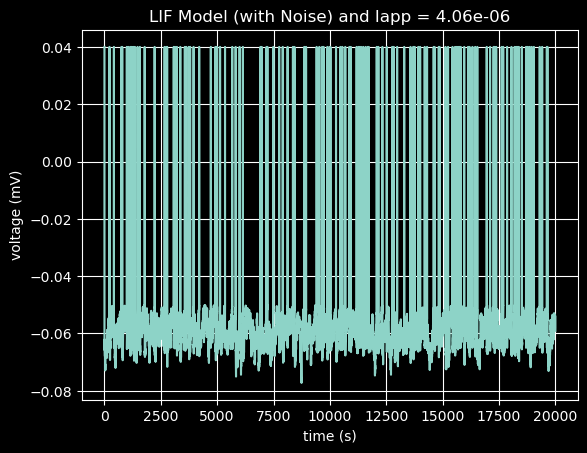

In [57]:
# Question 2
# Builds on Q1, going to copy relevant Q1 code below and leave Q1 as is above
# 2a
# Add a noise term to the simulation of Q1 by adding to the total membrane potential change
# at each time step:
# MATLAB: randn(1) * sigma_I*sqrt(dt) ------ python: np.random.randn() + sigma * np.sqrt(dt)

i_0 = i_th * 1.01                                   
i_app = np.ones_like(t) * i_0   

def runsim_noise(i_app=i_app, sigma=0):

    for i in range(1, t.shape[0]):
        noise = np.random.randn() * sigma * np.sqrt(dt)
        dvdt = (e_leak - v[i - 1]) / (r_membrane * c_membrane) + (i_app[i]/c_membrane)
        v[i] = v[i - 1] + dt * dvdt + noise        

        if v[i] > v_threshold:
            v[i] = v_reset
            v[i-1] = 40e-3
    return v

v = runsim_noise(i_app, sigma=0.1)    # sigma = 0 for no noise

plt.plot(v)
plt.title('LIF Model (with Noise) and Iapp = 4.06e-06')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.grid(True)

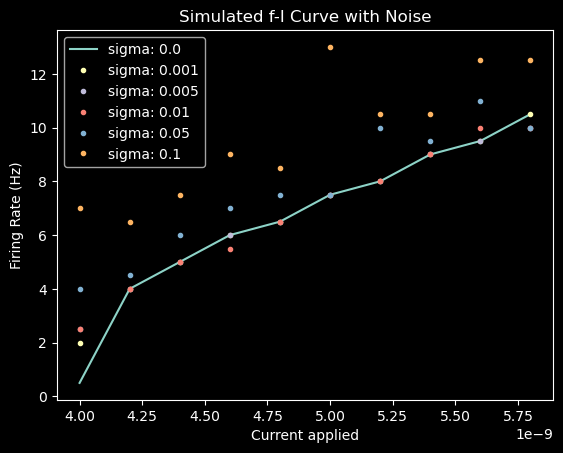

In [62]:
# 2b
# Plot the firing-rate curve for at least 2 different values of sigma
# Explain the effect of increasing sigma, which is proportional to stdev of voltage noise

currents = np.linspace(1, 1.45, 10)
currents = currents * i_th
rates = np.zeros_like(currents)

def get_rates(sigma):
    """
    Calculates spike rates for different current levels with noise. 
    
    Args:
        sigma: stdev of noise 
    Returns:
        rates: array of spike rates
    """
    for i in range(currents.shape[0]):
        # Reset simulation each time
        v = np.zeros_like(t)
        v[0] = e_leak
        i_0 = currents[i]
        i_app = np.full_like(t, i_0)

        # Run simulation
        v = runsim_noise(i_app, sigma)

        # Calculate spike rate
        num_spikes = count_spikes(v, v_reset)
        spike_rate = num_spikes / 2         # 2 seconds
        rates[i] = spike_rate
        
    return rates

# Sigma values to test
sigma_vals = np.array([0, 1, 5, 10, 50, 100]) / 1000
# Initialize array for rate values 
rate_vals = np.zeros((sigma_vals.shape[0], currents.shape[0]))

# Get firing rates for each value of sigma
for i, sigma in enumerate(sigma_vals):
    rate_vals[i] = get_rates(sigma)
    
    if i == 0:
        plt.plot(currents, rate_vals[i], '-', label=f'sigma: {sigma}')
    else: 
        plt.plot(currents, rate_vals[i], '.', label=f'sigma: {sigma}')
    
plt.legend()
plt.title('Simulated f-I Curve with Noise')
plt.xlabel('Current applied')
plt.ylabel('Firing Rate (Hz)')
plt.show()
    
# Increasing the noise parameter (sigma), which is proportional to standard deviation of the voltage noise, 
# Leads to an increase in firing rate (especially! at lower values of i_app / current applied).

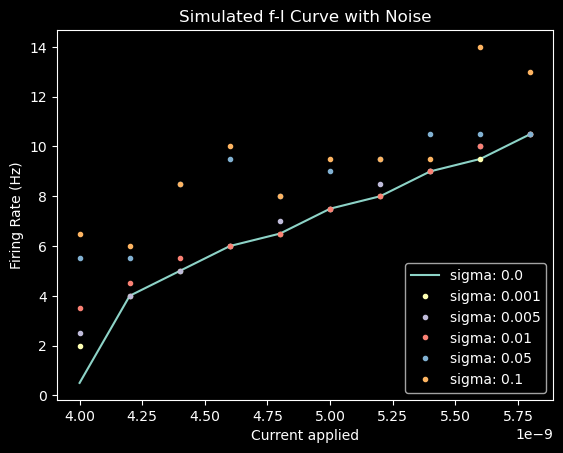

In [61]:
# 2c
# Repeat a simulation with dt a factor of 10 smaller
# Are the results significantly different?

# Change dt
dt = 0.00001


# Sigma values to test
sigma_vals = np.array([0, 1, 5, 10, 50, 100]) / 1000
# Initialize array for rate values 
rate_vals = np.zeros((sigma_vals.shape[0], currents.shape[0]))

# Get firing rates for each value of sigma
for i, sigma in enumerate(sigma_vals):
    rate_vals[i] = get_rates(sigma)
    
    if i == 0:
        plt.plot(currents, rate_vals[i], '-', label=f'sigma: {sigma}')
    else: 
        plt.plot(currents, rate_vals[i], '.', label=f'sigma: {sigma}')
    
plt.legend()
plt.title('Simulated f-I Curve with Noise')
plt.xlabel('Current applied')
plt.ylabel('Firing Rate (Hz)')
plt.show()
    
# Firing rate is smaller by a factor of 10, but f-I (and noise!) relationship remains the same